# Introduction to Gaussian Statistics & Statistical Pattern Recognition

1. ***Gaussian Statistics:***

    1.1 **Samples from a Gaussian Density:**

    - By simple inspection of 2D views of the data and of the corresponding pdf (probability density functions) contours, how can you tell which sample corresponds to a spherical process, which samples to a pdf with a diagonal covariance, and which to a pdf with a full covariance?

    Inspecting the 2D views of the data, we can easily check what is the covariance of the pdf under question.
    The cloud of points and the pdf contours corresponding to $\Sigma_{1}$ are circular, as the first and second dimension of the vectors are independant, as they also have a null covariance, AND the variance is the same in both dimensions, indicating an equivalent spread of the data along both axes, hence the circular blob of data points and the name AND the shape 'spherical process'.
    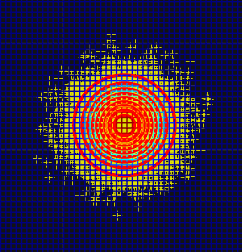

    The cloud of points and the pdf contours corresponding to $\Sigma_{2}$ are elliptic, with their axes parallel to the x & y axes. This is because the first and second dimensions are independant, they have a null covariance, AND the variance is different for both axes, indicating an unequivalent spread of the data along both axes.
    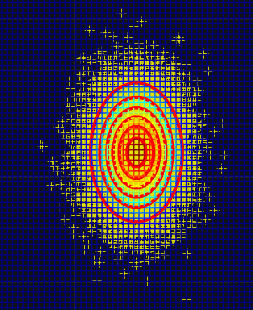

    The cloud of points and the pdf contours corresponding to $\Sigma_{3}$ are elliptic, but this time, not aligned with the x & y axes, since the covariance of both dimensions is not null.

    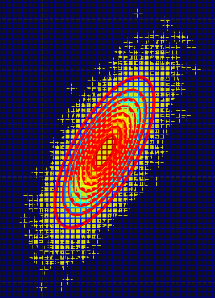


    1.2 **Gaussian modelling: mean and variance of a sample:**

    - When comparing the estimated values $\hat{\mu}$ and $\hat{\Sigma}$ with the original values of $\mu$ and $\Sigma_{3}$ (using the Euclidian distance and the matric 2-norm), what can you observe?

        + For the values computed for all data points (10000): the Euclidian distance between the estimated mean and the original mean is: 0.0138. While for the 2-norm distance between the covariance matrices is: 397.9721.

        + For the values computed for only 1000 points: the Euclidian distance between the estimated mean and the original mean is: 7.5631. While for the 2-norm distance between the covariance matrices is: 117.7994.

        + For the values computed for only 100 points: the Euclidian distance between the estimated mean and the original mean is: 11.2458. While for the 2-norm distance between the covariance matrices is: 809.3278.

    The more points, the better the estimates is a general rule that can be applied here. Furthermore, an accurate mean estimate requires less points than an accurate variance estimate. In general, in any data-based pattern classification technique, it is very important to have enough training examples to estimate some accurate models of the data. 

    1.3 **Likelihood of a sample with respect to a Gaussian model:**

    - Why do we want to compute the log-likelihood rather than the simple likelihood?

    Computing the log-likelihood turns the product into a sum: $$p(X|\Theta) = \prod_{i=1}^{N}p(x_{i}|\Theta) \iff log(p(X|\Theta)) = \sum_{i=1}^{N} log(p(x_{i}|\Theta)) $$ In the Gaussian case, computing the log also avoids the computation of exponentials: $$p(x|\Theta) = \frac{1}{\sqrt{2\pi}^{d}\sqrt{det(\Sigma)}}\cdot \exp^{-\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)}$$ $$log(p(x|\Theta)) = -\frac{d}{2} log(2\pi) -\frac{1}{2}log(det(\Sigma)) -\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu) $$

    Then, since log(x) is a monotically growing function, the log-likelihoods have the same relations of order as the likelihoods: $$p(x|\Theta_{1}) > p(x|\Theta_{2}) \iff log(p(x|\Theta_{1})) > log(p(x|\Theta_{2}))$$ so they can be used directly to classify samples. 

    In a classification framework, the computation can be even more simplified: the relations of order will remain valid if we drop the division by 2 and the $d log(2\pi)$ term, and we do have the right to drop these terms because they are independant of the classes. if $\mathcal{N}_{1}(\Theta_{1})$ and $\mathcal{N}_{2}(\Theta_{2})$ have the same variance, we can also drop the $log(det(\Sigma))$ term since in this case the variance itself becomes independant of the classes.

    As a summary, log-likelihoods are much more simpler to compute than likelihoods, and they are readily usable as alternative for classification tasks.


    - Of $\mathcal{N}_{1}$, $\mathcal{N}_{2}$, $\mathcal{N}_{3}$, $\mathcal{N}_{4}$, which model "explains" best the data $X_{3}$? Which model has the highest number of parameters? Which model would you choose for a good compromise between the number of parameters and the capacity to represent accurately the data?

        + $log(p(X|\mathcal{N}_{1})) = -125001.1991$
        + $log(p(X|\mathcal{N}_{2})) = -122516.1189$
        + $log(p(X|\mathcal{N}_{3})) = -119154.7088$
        + $log(p(X|\mathcal{N}_{4})) = -857259.1569$

    The model $\mathcal{N}_{3}$ has the highest likelihood for the dataset $X_{3}$. So we can say that dataset $X_{3}$ is more likely to have been generated by model $\mathcal{N}_{3}$ than by the other models, or that $\mathcal{N}_{3}$ explains the best the data between the existing models.

    On the other hand, model $\mathcal{N}_{3}$ has the highest number of parameters (2 terms for the mean, 4 non null terms for the variance). This may seem low in two dimensions, but the number of parameters grows exponentially with the dimension of the data. Also the more parameters we have, the more data we need to train (estimate) them.

    In "real world" speech recognition applications, the dimensionality of the speech features is typically of the order of 40 (1 energy coefficient + 12 cepstrum coefficients + their first and second order derivatives = a vector of 39 coefficients). Further processing is applied to orthogonalize the data (eg. cepstral coefficients can be interpreted as orthogonalized spectra, and hence admit quasi-diagonal covariance matrices). 

    Therefore, the compromise usually considered is to use models with diagonal covariance matrices, such as the model $\mathcal{N}_{2}$ in our example (second highest likelihood).


2. ***Statistical Pattern Recognition:***

    2.1 **A-priori Class Probabilities:**

    - Supposing that the whole database covers adequately an imaginary language made only of /a/'s, /e/'s, /i/'s, /o/'s and /y/'s, compute the probability $P(q_{k})$ of each class $q_{k} k \in$ {/a/, /e/, /i/, /o/, /y/}. What are the most common and the least common phoneme in the language? 

        + $P_{a} = 0.2500$
        + $P_{e} = 0.3000$
        + $P_{i} = 0.2500$
        + $P_{o} = 0.1500$
        + $P_{y} = 0.0500$

    The most common phoneme is /e/, while the least common is /y/.

    2.2 **Gaussian Modelling of Classes:**

    - Plot each vowel's data as clouds of points in the 2D plane. Train the Gaussian models corresponding to each class. Plot their contours.

    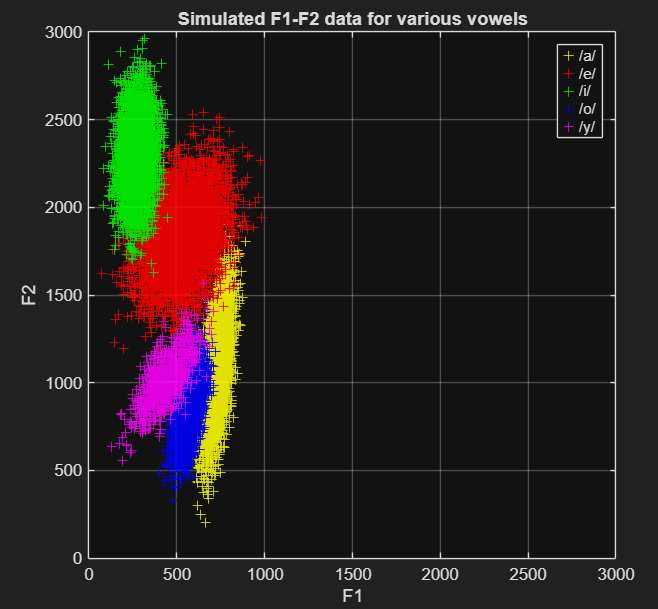

    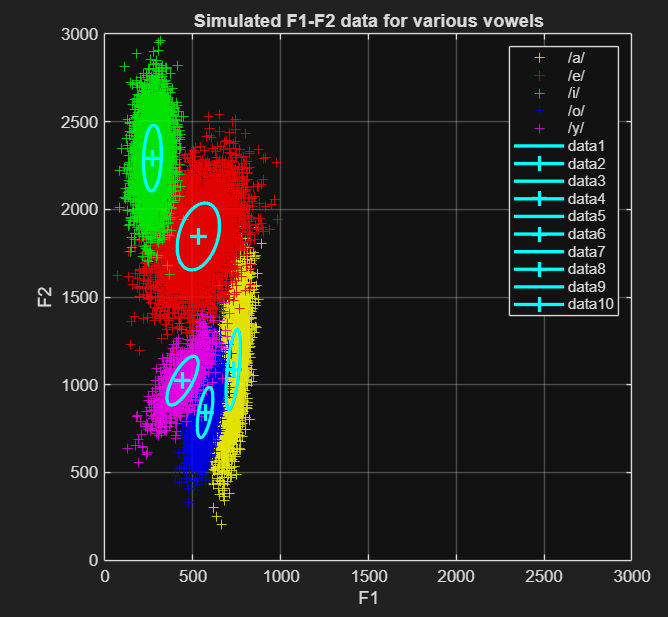

    + $\mu_{/a/} = \begin{pmatrix} 729.5 \\ 1087.8 \end{pmatrix}$, $\Sigma_{/a/} = \begin{pmatrix} 1632 &&  5202 \\ 5202 && 2267 \end{pmatrix}$
    + $\mu_{/e/} = \begin{pmatrix} 531.6 \\ 1844.9 \end{pmatrix}$, $\Sigma_{/a/} = \begin{pmatrix} 14494 &&  7282 \\ 7282 && 36447 \end{pmatrix}$
    + $\mu_{/i/} = \begin{pmatrix} 270.8 \\ 2292.2 \end{pmatrix}$, $\Sigma_{/a/} = \begin{pmatrix} 2603 &&  1138 \\ 1138 && 35310 \end{pmatrix}$
    + $\mu_{/o/} = \begin{pmatrix} 569.3860 \\ 842.6966 \end{pmatrix}$, $\Sigma_{/a/} = \begin{pmatrix} 1977 &&  3570 \\ 3570 && 20690 \end{pmatrix}$
    + $\mu_{/y/} = \begin{pmatrix} 441.6 \\ 1022.9 \end{pmatrix}$, $\Sigma_{/a/} = \begin{pmatrix} 7894 &&  8770 \\ 8770 && 19333 \end{pmatrix}$


    2.3 **Bayesian Classification:**

    - In our case (Gaussian models for phoenem classes), what is the meaning of $\Theta$ given in the formulas? (Parameter set of all the class models) 
    $$X \in q_{k}\space if\space P(q_{k}|X, \Theta) \ge P(q_{j}|X, \Theta), \forall j \ne k$$
    $$P(q_{k}|X, \Theta) = \frac{p(X|q_{k}, \Theta)P(q_{k}|\Theta)}{p(X|\Theta)}$$ $$\forall k, P(q_{k}|X, \Theta) \propto p(X|q_{k}, \Theta)P(q_{k}|\Theta)$$ $$log(P(q_{k}|X, \Theta)) \cong log(p(X|q_{k}, \Theta)) + log(P(q_{k}|\Theta))$$

    In our case, $\Theta$ represents the set of all the means $\mu_{k}$ and variances $\Sigma_{k}$, $k\in $ {/a/, /e/, /i/, /o/, /y/}.

    - What is the expression of $p(X|q_{k}, \Theta)$ and of $log(p(X|q_{k}, \Theta))$?

    The expression of $p(X|q_{k}, \Theta)$ and of $log(p(X|q_{k}, \Theta))$ correspond to the computation of the Gaussian pdf and its logarithm.

    - What is the definition of the probability $P(q_{k}|\Theta)$?

    The probability $P(q_{k}|\Theta)$ is the a-priori class probability for the class $q_{k}$ (corresponding to the parameters $\Theta_{k}\in\Theta$). It defines an absolute probability of occurence for the class $q_{k}$.


    - Now, we have modelled each vowel class with a Gaussian pdf, we know the probabilities $P(q_{k})$ of each class in the imaginary language, and we assume that the speech features ($\ne$ speech classes) are equi-probable. What is the most probable class $q_{k}$ for the speech feature points $x = \begin{pmatrix} F_{1} \\ F_{2} \end{pmatrix}$ given in the following table?

    $$\begin{vmatrix}
    \hline
    x && F_{1} && F_{2} && log(P(q_{/a/}|x)) && log(P(q_{/e/}|x)) && log(P(q_{/i/}|x)) && log(P(q_{/o/}|x)) && log(P(q_{/y/}|x)) && Most\space Probable\space Class\\
    \hline
    1. && 400 && 1800 && -88.9257 && -13.6356 && -19.9132 && -75.5643 && -49.3573 && q_{/e/}\\
    \hline
    2. && 400 && 1000 && -58.393 && -22.8786 && -41.7136 && -27.0938 && -14.0427 && q_{/y/}\\
    \hline
    3. && 530 && 1000 && -28.561 && -23.8978 && -53.6589 && -14.5352 && -15.1644 && q_{/o/}\\
    \hline
    4. && 600 && 1300 && -22.77 && -18.3107 && -51.736 && -18.2221 && -16.0276 && q_{/y/}\\
    \hline
    5. && 670 && 1300 && -15.5059 && -19.4504 && -62.5404 && -17.5389 && -17.2378 && q_{/a/}\\
    \hline
    6. && 420 && 2500 && -122.0943 && -21.1723 && -16.9512 && -148.2887 && -131.418 && q_{/i/}\\
    \hline

    \end{vmatrix}$$

    2.4 **Discriminant Surfaces:**

    - What is the link betwee discriminant functions & Bayesian classifiers?

    The a-posteriori probability $P(q_{k}|x)$ that a sample x belongs to class $q_{k}$ is itself a discriminant function: 

    $$x\in q_{k} \iff P(q_{k}|x) \ge P(q_{l}|x) \forall l \ne k \\
    
    \iff p(x|q_{k})P(q_{k}) \ge p(x|q_{l})P(q_{l}) \\
    
    \iff log(p(x|q_{k})) + log(P(q_{k})) \ge log(p(x|q_{l})) + log(P(q_{l}))$$

    - What is the nature of the surface that separates class /i/ from class /e/ when the two models have different variances? Can you explain the origin of this form?
    What is the nature of the surface that separates class /i/ from class /e/ when the two models have the same variance? Why is it different from the previous discriminant surface?

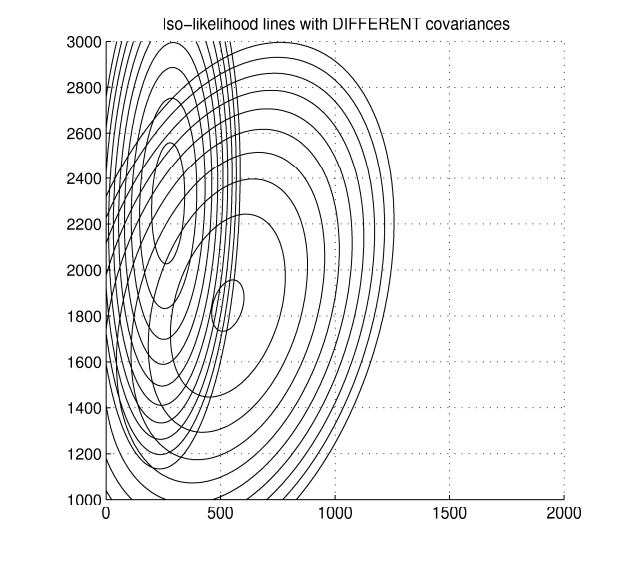

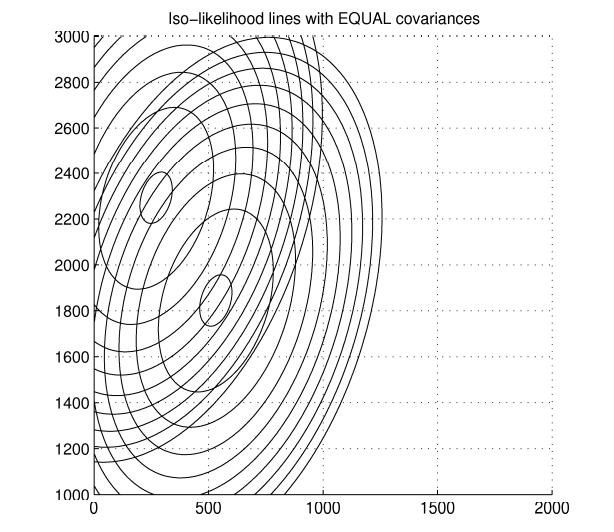

In the case of different variances, the discriminant surface is a parabola. As a matter of fact, in the Gaussian case: $$log(p(x|\Theta)) \simeq -\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu) -\frac{1}{2}log(det(\Sigma))$$ which is a quadratic form. Therefore the equation $log(p(x|\Sigma_{1})) = log(p(x|\Sigma_{2}))$ which describes the discriminant surface is necessarily a second order equation. Hence, its solution describes a parabolic discriminant surface.

In the case where the covariance matrices are equal, the separation between both classes does not depend upon the covariance $\Sigma$ anymore: 
$$-\frac{1}{2}(x-\mu_{1})^{T}\Sigma^{-1}(x-\mu_{1}) -\frac{1}{2}log(det(\Sigma)) = -\frac{1}{2}(x-\mu_{2})^{T}\Sigma^{-1}(x-\mu_{2}) -\frac{1}{2}log(det(\Sigma))\\
\iff -\frac{1}{2}(x-\mu_{1})^{T}\Sigma^{-1}(x-\mu_{1}) = -\frac{1}{2}(x-\mu_{2})^{T}\Sigma^{-1}(x-\mu_{2})\\
\iff -\frac{1}{2}x^{T}\Sigma^{-1}x + -\frac{1}{2}\mu_{1}^{T}\Sigma^{-1}x - -\frac{1}{2}\mu_{1}^{T}\Sigma^{-1}\mu_{1} = -\frac{1}{2}x^{T}\Sigma^{-1}x + -\frac{1}{2}\mu_{2}^{T}\Sigma^{-1}x - -\frac{1}{2}\mu_{2}^{T}\Sigma^{-1}\mu_{2}
$$
Hence the equation of the surface that separates both classes becomes: $$(\mu_{1}-\mu_{2})^{T}\Sigma^{-1}x - \frac{1}{2}(\mu_{1}-\mu_{2})^{T}\Sigma^{-1}(\mu_{1}-\mu_{2}) = 0$$
which has a linear form. In the equal covariance case, using a Bayesian classifier with Gaussian densities is therefore equivalent to using discriminant functions of the form: $f_{k}(x) = \mathcal{w}_{k}^{T}x + \mathcal{w}_{k0}$ where 
$$\mathcal{w}_{k}^{T} = \mu_{k}^{T}\Sigma^{-1}\\
\mathcal{w}_{k0} = -\frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k}$$

As a summary, we have shown that Bayesian classifiers with Gaussian models separate the classes with combinations of parabolic surfaces. If the covariance matrices of the models are equal, the parabolic separation surfaces become simple hyper-planes.